In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_process import arma_generate_sample
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX 
from sklearn.metrics import mean_squared_error
from math import sqrt
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm
from pmdarima.arima import auto_arima
from statsmodels.graphics.tsaplots import plot_predict

In [2]:
import ta as ta
from ta import add_all_ta_features
from ta.utils import dropna

In [3]:
data = pd.read_csv(r'C:\Users\hp\Documents\Mean Reversion\NIFTY 50_Data.csv', index_col='Date', parse_dates=True)

In [4]:
data.head()

,Close
Date,
2023-05-04,18255.80
2023-05-03,18089.85
2023-05-02,18147.65
2023-04-28,18065.00
2023-04-27,17915.05


In [5]:
data.tail()

,Close
Date,
2013-05-10,6094.7
2013-05-09,6050.1
2013-05-08,6069.3
2013-05-07,6043.5
2013-05-06,5971.0


In [6]:
old_data = data

In [7]:
data.sort_values(by=['Date'], inplace=True)

In [8]:
data.head()

,Close
Date,
2013-05-06,5971.0
2013-05-07,6043.5
2013-05-08,6069.3
2013-05-09,6050.1
2013-05-10,6094.7


In [9]:
data.tail()

,Close
Date,
2023-04-27,17915.05
2023-04-28,18065.00
2023-05-02,18147.65
2023-05-03,18089.85
2023-05-04,18255.80


In [10]:
somedata = ta.momentum.RSIIndicator(data['Close'])

In [11]:
somedata.rsi()

Date
2013-05-06          NaN
2013-05-07          NaN
2013-05-08          NaN
2013-05-09          NaN
2013-05-10          NaN
                ...    
2023-04-27    66.845643
2023-04-28    71.235000
2023-05-02    73.330807
2023-05-03    69.516261
2023-05-04    73.739901
Name: rsi, Length: 2474, dtype: float64

In [12]:
somedata.rsi().head(14)

Date
2013-05-06          NaN
2013-05-07          NaN
2013-05-08          NaN
2013-05-09          NaN
2013-05-10          NaN
2013-05-11          NaN
2013-05-13          NaN
2013-05-14          NaN
2013-05-15          NaN
2013-05-16          NaN
2013-05-17          NaN
2013-05-20          NaN
2013-05-21          NaN
2013-05-22    55.961349
Name: rsi, dtype: float64

In [13]:
data['rsi'] = somedata.rsi()

In [15]:
data.head(14)

,Close,rsi
Date,,
2013-05-06,5971.0,NaN
2013-05-07,6043.5,NaN
2013-05-08,6069.3,NaN
2013-05-09,6050.1,NaN
2013-05-10,6094.7,NaN
2013-05-11,6107.2,NaN
2013-05-13,5980.4,NaN
2013-05-14,5995.4,NaN
2013-05-15,6146.7,NaN


In [16]:
data.tail()

,Close,rsi
Date,,
2023-04-27,17915.05,66.845643
2023-04-28,18065.00,71.235000
2023-05-02,18147.65,73.330807
2023-05-03,18089.85,69.516261
2023-05-04,18255.80,73.739901


In [19]:
data.dropna(inplace=True)

In [20]:
data.head()

,Close,rsi
Date,,
2013-05-22,6094.5,55.961349
2013-05-23,5967.0,41.290429
2013-05-24,5983.5,43.359864
2013-05-27,6083.1,53.918933
2013-05-28,6111.2,56.389109


In [21]:
data.tail()

,Close,rsi
Date,,
2023-04-27,17915.05,66.845643
2023-04-28,18065.00,71.235000
2023-05-02,18147.65,73.330807
2023-05-03,18089.85,69.516261
2023-05-04,18255.80,73.739901


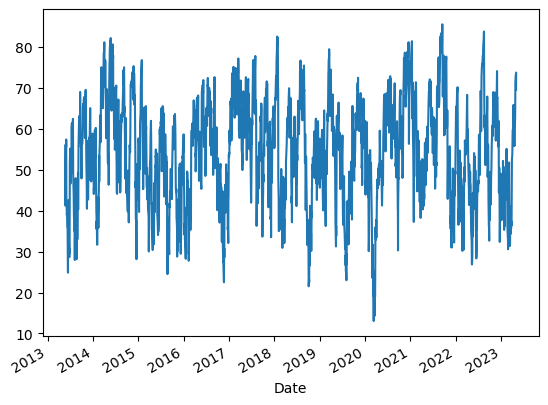

In [23]:
fig, ax = plt.subplots()
data['rsi'].plot(ax=ax)
plt.show()

In [24]:
data['ema5'] = data['rsi'].ewm(span=5).mean()

In [25]:
data['ema30'] = data['rsi'].ewm(span=30).mean()

In [26]:
data.head()

,Close,rsi,ema5,ema30
Date,,,,
2013-05-22,6094.5,55.961349,55.961349,55.961349
2013-05-23,5967.0,41.290429,47.158797,48.381373
2013-05-24,5983.5,43.359864,45.359302,46.594750
2013-05-27,6083.1,53.918933,48.914841,48.612829
2013-05-28,6111.2,56.389109,51.784110,50.382121


In [27]:
data.tail()

,Close,rsi,ema5,ema30
Date,,,,
2023-04-27,17915.05,66.845643,62.802908,53.763247
2023-04-28,18065.00,71.235000,65.613605,54.890457
2023-05-02,18147.65,73.330807,68.186006,56.080157
2023-05-03,18089.85,69.516261,68.629424,56.947002
2023-05-04,18255.80,73.739901,70.332916,58.030415


In [28]:
check = data['rsi'].rolling(5).mean()

In [29]:
check

Date
2013-05-22          NaN
2013-05-23          NaN
2013-05-24          NaN
2013-05-27          NaN
2013-05-28    50.183937
                ...    
2023-04-27    61.720530
2023-04-28    64.763400
2023-05-02    67.284565
2023-05-03    68.851608
2023-05-04    70.933523
Name: rsi, Length: 2461, dtype: float64

In [30]:
data['sma5'] = data['rsi'].rolling(5).mean()

In [31]:
data['sma30'] = data['rsi'].rolling(30).mean()

In [32]:
data.head()

,Close,rsi,ema5,ema30,sma5,sma30
Date,,,,,,
2013-05-22,6094.5,55.961349,55.961349,55.961349,NaN,NaN
2013-05-23,5967.0,41.290429,47.158797,48.381373,NaN,NaN
2013-05-24,5983.5,43.359864,45.359302,46.594750,NaN,NaN
2013-05-27,6083.1,53.918933,48.914841,48.612829,NaN,NaN
2013-05-28,6111.2,56.389109,51.784110,50.382121,50.183937,NaN


In [33]:
data.tail()

,Close,rsi,ema5,ema30,sma5,sma30
Date,,,,,,
2023-04-27,17915.05,66.845643,62.802908,53.763247,61.720530,49.686505
2023-04-28,18065.00,71.235000,65.613605,54.890457,64.763400,50.893076
2023-05-02,18147.65,73.330807,68.186006,56.080157,67.284565,52.244405
2023-05-03,18089.85,69.516261,68.629424,56.947002,68.851608,53.514917
2023-05-04,18255.80,73.739901,70.332916,58.030415,70.933523,54.906652


In [34]:
data['sma_signal'] = data['sma5'] - data['sma30']

In [36]:
data.head(30)

,Close,rsi,ema5,ema30,sma5,sma30,sma_signal
Date,,,,,,,
2013-05-22,6094.5,55.961349,55.961349,55.961349,NaN,NaN,NaN
2013-05-23,5967.0,41.290429,47.158797,48.381373,NaN,NaN,NaN
2013-05-24,5983.5,43.359864,45.359302,46.594750,NaN,NaN,NaN
2013-05-27,6083.1,53.918933,48.914841,48.612829,NaN,NaN,NaN
2013-05-28,6111.2,56.389109,51.784110,50.382121,50.183937,NaN,NaN
2013-05-29,6104.3,55.600948,53.178834,51.403102,50.111856,NaN,NaN
2013-05-30,6124.0,57.430400,54.684124,52.445563,53.339851,NaN,NaN
2013-05-31,5985.9,43.804185,50.910226,51.097197,53.428715,NaN,NaN
2013-06-03,5939.3,40.327159,47.288323,49.557589,50.710360,NaN,NaN


In [37]:
data.tail()

,Close,rsi,ema5,ema30,sma5,sma30,sma_signal
Date,,,,,,,
2023-04-27,17915.05,66.845643,62.802908,53.763247,61.720530,49.686505,12.034026
2023-04-28,18065.00,71.235000,65.613605,54.890457,64.763400,50.893076,13.870324
2023-05-02,18147.65,73.330807,68.186006,56.080157,67.284565,52.244405,15.040160
2023-05-03,18089.85,69.516261,68.629424,56.947002,68.851608,53.514917,15.336691
2023-05-04,18255.80,73.739901,70.332916,58.030415,70.933523,54.906652,16.026870


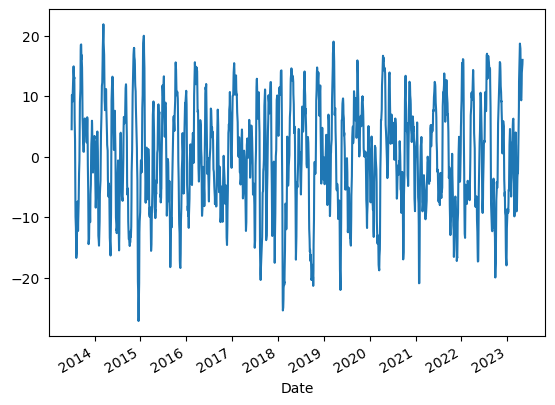

In [38]:
fig, ax = plt.subplots()
data['sma_signal'].plot(ax=ax)
plt.show()

In [39]:
data['daily_return'] = data['Close'].pct_change()

In [40]:
data.head()

,Close,rsi,ema5,ema30,sma5,sma30,sma_signal,daily_return
Date,,,,,,,,
2013-05-22,6094.5,55.961349,55.961349,55.961349,NaN,NaN,NaN,NaN
2013-05-23,5967.0,41.290429,47.158797,48.381373,NaN,NaN,NaN,-0.020921
2013-05-24,5983.5,43.359864,45.359302,46.594750,NaN,NaN,NaN,0.002765
2013-05-27,6083.1,53.918933,48.914841,48.612829,NaN,NaN,NaN,0.016646
2013-05-28,6111.2,56.389109,51.784110,50.382121,50.183937,NaN,NaN,0.004619


In [41]:
data.tail()

,Close,rsi,ema5,ema30,sma5,sma30,sma_signal,daily_return
Date,,,,,,,,
2023-04-27,17915.05,66.845643,62.802908,53.763247,61.720530,49.686505,12.034026,0.005695
2023-04-28,18065.00,71.235000,65.613605,54.890457,64.763400,50.893076,13.870324,0.008370
2023-05-02,18147.65,73.330807,68.186006,56.080157,67.284565,52.244405,15.040160,0.004575
2023-05-03,18089.85,69.516261,68.629424,56.947002,68.851608,53.514917,15.336691,-0.003185
2023-05-04,18255.80,73.739901,70.332916,58.030415,70.933523,54.906652,16.026870,0.009174


In [42]:
data['daily_return'] = data['daily_return'].mul(100)

In [43]:
data.head()

,Close,rsi,ema5,ema30,sma5,sma30,sma_signal,daily_return
Date,,,,,,,,
2013-05-22,6094.5,55.961349,55.961349,55.961349,NaN,NaN,NaN,NaN
2013-05-23,5967.0,41.290429,47.158797,48.381373,NaN,NaN,NaN,-2.092050
2013-05-24,5983.5,43.359864,45.359302,46.594750,NaN,NaN,NaN,0.276521
2013-05-27,6083.1,53.918933,48.914841,48.612829,NaN,NaN,NaN,1.664578
2013-05-28,6111.2,56.389109,51.784110,50.382121,50.183937,NaN,NaN,0.461936


In [44]:
data.tail()

,Close,rsi,ema5,ema30,sma5,sma30,sma_signal,daily_return
Date,,,,,,,,
2023-04-27,17915.05,66.845643,62.802908,53.763247,61.720530,49.686505,12.034026,0.569509
2023-04-28,18065.00,71.235000,65.613605,54.890457,64.763400,50.893076,13.870324,0.837006
2023-05-02,18147.65,73.330807,68.186006,56.080157,67.284565,52.244405,15.040160,0.457515
2023-05-03,18089.85,69.516261,68.629424,56.947002,68.851608,53.514917,15.336691,-0.318499
2023-05-04,18255.80,73.739901,70.332916,58.030415,70.933523,54.906652,16.026870,0.917365


In [45]:
data['rsi_shift_1'] = data['rsi'].shift()

In [46]:
data.head()

,Close,rsi,ema5,ema30,sma5,sma30,sma_signal,daily_return,rsi_shift_1
Date,,,,,,,,,
2013-05-22,6094.5,55.961349,55.961349,55.961349,NaN,NaN,NaN,NaN,NaN
2013-05-23,5967.0,41.290429,47.158797,48.381373,NaN,NaN,NaN,-2.092050,55.961349
2013-05-24,5983.5,43.359864,45.359302,46.594750,NaN,NaN,NaN,0.276521,41.290429
2013-05-27,6083.1,53.918933,48.914841,48.612829,NaN,NaN,NaN,1.664578,43.359864
2013-05-28,6111.2,56.389109,51.784110,50.382121,50.183937,NaN,NaN,0.461936,53.918933


In [47]:
data.tail()

,Close,rsi,ema5,ema30,sma5,sma30,sma_signal,daily_return,rsi_shift_1
Date,,,,,,,,,
2023-04-27,17915.05,66.845643,62.802908,53.763247,61.720530,49.686505,12.034026,0.569509,63.330327
2023-04-28,18065.00,71.235000,65.613605,54.890457,64.763400,50.893076,13.870324,0.837006,66.845643
2023-05-02,18147.65,73.330807,68.186006,56.080157,67.284565,52.244405,15.040160,0.457515,71.235000
2023-05-03,18089.85,69.516261,68.629424,56.947002,68.851608,53.514917,15.336691,-0.318499,73.330807
2023-05-04,18255.80,73.739901,70.332916,58.030415,70.933523,54.906652,16.026870,0.917365,69.516261


In [48]:
data['sma_signal_shift'] = data['sma_signal'].shift()

In [49]:
data.head()

,Close,rsi,ema5,ema30,sma5,sma30,sma_signal,daily_return,rsi_shift_1,sma_signal_shift
Date,,,,,,,,,,
2013-05-22,6094.5,55.961349,55.961349,55.961349,NaN,NaN,NaN,NaN,NaN,NaN
2013-05-23,5967.0,41.290429,47.158797,48.381373,NaN,NaN,NaN,-2.092050,55.961349,NaN
2013-05-24,5983.5,43.359864,45.359302,46.594750,NaN,NaN,NaN,0.276521,41.290429,NaN
2013-05-27,6083.1,53.918933,48.914841,48.612829,NaN,NaN,NaN,1.664578,43.359864,NaN
2013-05-28,6111.2,56.389109,51.784110,50.382121,50.183937,NaN,NaN,0.461936,53.918933,NaN


In [50]:
data.tail()

,Close,rsi,ema5,ema30,sma5,sma30,sma_signal,daily_return,rsi_shift_1,sma_signal_shift
Date,,,,,,,,,,
2023-04-27,17915.05,66.845643,62.802908,53.763247,61.720530,49.686505,12.034026,0.569509,63.330327,10.730206
2023-04-28,18065.00,71.235000,65.613605,54.890457,64.763400,50.893076,13.870324,0.837006,66.845643,12.034026
2023-05-02,18147.65,73.330807,68.186006,56.080157,67.284565,52.244405,15.040160,0.457515,71.235000,13.870324
2023-05-03,18089.85,69.516261,68.629424,56.947002,68.851608,53.514917,15.336691,-0.318499,73.330807,15.040160
2023-05-04,18255.80,73.739901,70.332916,58.030415,70.933523,54.906652,16.026870,0.917365,69.516261,15.336691


In [ ]:
data['market_predict'] = 
if data['sma_signal'].mul(data['daily_return']) > 0:
    data['market_predict'] = 1
else data['market_predict'] = -1

In [51]:
data['direction'] = data['sma_signal_shift'].mul(data['daily_return'])

In [52]:
data.tail()

,Close,rsi,ema5,ema30,sma5,sma30,sma_signal,daily_return,rsi_shift_1,sma_signal_shift,direction
Date,,,,,,,,,,,
2023-04-27,17915.05,66.845643,62.802908,53.763247,61.720530,49.686505,12.034026,0.569509,63.330327,10.730206,6.110946
2023-04-28,18065.00,71.235000,65.613605,54.890457,64.763400,50.893076,13.870324,0.837006,66.845643,12.034026,10.072549
2023-05-02,18147.65,73.330807,68.186006,56.080157,67.284565,52.244405,15.040160,0.457515,71.235000,13.870324,6.345875
2023-05-03,18089.85,69.516261,68.629424,56.947002,68.851608,53.514917,15.336691,-0.318499,73.330807,15.040160,-4.790269
2023-05-04,18255.80,73.739901,70.332916,58.030415,70.933523,54.906652,16.026870,0.917365,69.516261,15.336691,14.069347


In [53]:
type(data)

pandas.core.frame.DataFrame

In [54]:
data.loc[data['direction'] > 0, 'direction'] = 1
data.loc[data['direction'] < 0, 'direction'] = -1

In [55]:
data.tail()

,Close,rsi,ema5,ema30,sma5,sma30,sma_signal,daily_return,rsi_shift_1,sma_signal_shift,direction
Date,,,,,,,,,,,
2023-04-27,17915.05,66.845643,62.802908,53.763247,61.720530,49.686505,12.034026,0.569509,63.330327,10.730206,1.0
2023-04-28,18065.00,71.235000,65.613605,54.890457,64.763400,50.893076,13.870324,0.837006,66.845643,12.034026,1.0
2023-05-02,18147.65,73.330807,68.186006,56.080157,67.284565,52.244405,15.040160,0.457515,71.235000,13.870324,1.0
2023-05-03,18089.85,69.516261,68.629424,56.947002,68.851608,53.514917,15.336691,-0.318499,73.330807,15.040160,-1.0
2023-05-04,18255.80,73.739901,70.332916,58.030415,70.933523,54.906652,16.026870,0.917365,69.516261,15.336691,1.0


In [56]:
data['daily_return'] = data['daily_return'].div(100)

In [57]:
data.tail()

,Close,rsi,ema5,ema30,sma5,sma30,sma_signal,daily_return,rsi_shift_1,sma_signal_shift,direction
Date,,,,,,,,,,,
2023-04-27,17915.05,66.845643,62.802908,53.763247,61.720530,49.686505,12.034026,0.005695,63.330327,10.730206,1.0
2023-04-28,18065.00,71.235000,65.613605,54.890457,64.763400,50.893076,13.870324,0.008370,66.845643,12.034026,1.0
2023-05-02,18147.65,73.330807,68.186006,56.080157,67.284565,52.244405,15.040160,0.004575,71.235000,13.870324,1.0
2023-05-03,18089.85,69.516261,68.629424,56.947002,68.851608,53.514917,15.336691,-0.003185,73.330807,15.040160,-1.0
2023-05-04,18255.80,73.739901,70.332916,58.030415,70.933523,54.906652,16.026870,0.009174,69.516261,15.336691,1.0


In [58]:
data['market'] = (1 + data['direction']*(data['daily_return'].abs()))
##(1+direction*mod(daily_return))

In [59]:
data.tail()

,Close,rsi,ema5,ema30,sma5,sma30,sma_signal,daily_return,rsi_shift_1,sma_signal_shift,direction,market
Date,,,,,,,,,,,,
2023-04-27,17915.05,66.845643,62.802908,53.763247,61.720530,49.686505,12.034026,0.005695,63.330327,10.730206,1.0,1.005695
2023-04-28,18065.00,71.235000,65.613605,54.890457,64.763400,50.893076,13.870324,0.008370,66.845643,12.034026,1.0,1.008370
2023-05-02,18147.65,73.330807,68.186006,56.080157,67.284565,52.244405,15.040160,0.004575,71.235000,13.870324,1.0,1.004575
2023-05-03,18089.85,69.516261,68.629424,56.947002,68.851608,53.514917,15.336691,-0.003185,73.330807,15.040160,-1.0,0.996815
2023-05-04,18255.80,73.739901,70.332916,58.030415,70.933523,54.906652,16.026870,0.009174,69.516261,15.336691,1.0,1.009174


In [60]:
data['market'].cumprod()

Date
2013-05-22         NaN
2013-05-23         NaN
2013-05-24         NaN
2013-05-27         NaN
2013-05-28         NaN
                ...   
2023-04-27    1.394660
2023-04-28    1.406334
2023-05-02    1.412768
2023-05-03    1.408268
2023-05-04    1.421187
Name: market, Length: 2461, dtype: float64

In [61]:
data['market'] = data['market'].cumprod()

In [62]:
data.tail()

,Close,rsi,ema5,ema30,sma5,sma30,sma_signal,daily_return,rsi_shift_1,sma_signal_shift,direction,market
Date,,,,,,,,,,,,
2023-04-27,17915.05,66.845643,62.802908,53.763247,61.720530,49.686505,12.034026,0.005695,63.330327,10.730206,1.0,1.394660
2023-04-28,18065.00,71.235000,65.613605,54.890457,64.763400,50.893076,13.870324,0.008370,66.845643,12.034026,1.0,1.406334
2023-05-02,18147.65,73.330807,68.186006,56.080157,67.284565,52.244405,15.040160,0.004575,71.235000,13.870324,1.0,1.412768
2023-05-03,18089.85,69.516261,68.629424,56.947002,68.851608,53.514917,15.336691,-0.003185,73.330807,15.040160,-1.0,1.408268
2023-05-04,18255.80,73.739901,70.332916,58.030415,70.933523,54.906652,16.026870,0.009174,69.516261,15.336691,1.0,1.421187


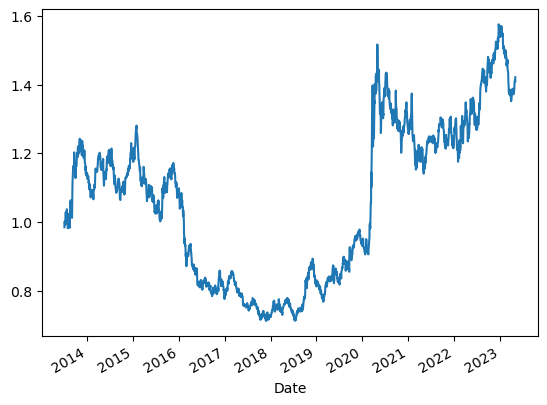

In [63]:
fig, ax = plt.subplots()
data['market'].plot(ax=ax)
plt.show()

In [64]:
annual_compound_return = (data['market'].iloc[-1])**(1/10)

In [68]:
print(100*(annual_compound_return-1))

3.5774280623835475


In [69]:
data.tail()

,Close,rsi,ema5,ema30,sma5,sma30,sma_signal,daily_return,rsi_shift_1,sma_signal_shift,direction,market
Date,,,,,,,,,,,,
2023-04-27,17915.05,66.845643,62.802908,53.763247,61.720530,49.686505,12.034026,0.005695,63.330327,10.730206,1.0,1.394660
2023-04-28,18065.00,71.235000,65.613605,54.890457,64.763400,50.893076,13.870324,0.008370,66.845643,12.034026,1.0,1.406334
2023-05-02,18147.65,73.330807,68.186006,56.080157,67.284565,52.244405,15.040160,0.004575,71.235000,13.870324,1.0,1.412768
2023-05-03,18089.85,69.516261,68.629424,56.947002,68.851608,53.514917,15.336691,-0.003185,73.330807,15.040160,-1.0,1.408268
2023-05-04,18255.80,73.739901,70.332916,58.030415,70.933523,54.906652,16.026870,0.009174,69.516261,15.336691,1.0,1.421187


In [70]:
save_data = data

In [77]:
save_data.tail()

,Close,rsi,sma_signal,daily_return,rsi_shift_1,sma_signal_shift,direction,market,mri_rsi
Date,,,,,,,,,
2023-04-27,17915.05,66.845643,12.034026,0.005695,63.330327,10.730206,1.0,1.394660,NaN
2023-04-28,18065.00,71.235000,13.870324,0.008370,66.845643,12.034026,1.0,1.406334,NaN
2023-05-02,18147.65,73.330807,15.040160,0.004575,71.235000,13.870324,1.0,1.412768,68.765000
2023-05-03,18089.85,69.516261,15.336691,-0.003185,73.330807,15.040160,-1.0,1.408268,66.669193
2023-05-04,18255.80,73.739901,16.026870,0.009174,69.516261,15.336691,1.0,1.421187,NaN


In [75]:
data = save_data

In [76]:
data.tail()

,Close,rsi,sma_signal,daily_return,rsi_shift_1,sma_signal_shift,direction,market,mri_rsi
Date,,,,,,,,,
2023-04-27,17915.05,66.845643,12.034026,0.005695,63.330327,10.730206,1.0,1.394660,NaN
2023-04-28,18065.00,71.235000,13.870324,0.008370,66.845643,12.034026,1.0,1.406334,NaN
2023-05-02,18147.65,73.330807,15.040160,0.004575,71.235000,13.870324,1.0,1.412768,68.765000
2023-05-03,18089.85,69.516261,15.336691,-0.003185,73.330807,15.040160,-1.0,1.408268,66.669193
2023-05-04,18255.80,73.739901,16.026870,0.009174,69.516261,15.336691,1.0,1.421187,NaN


In [71]:
data.drop(['ema5', 'ema30', 'sma5', 'sma30'], axis=1, inplace=True)

In [72]:
data.tail()

,Close,rsi,sma_signal,daily_return,rsi_shift_1,sma_signal_shift,direction,market
Date,,,,,,,,
2023-04-27,17915.05,66.845643,12.034026,0.005695,63.330327,10.730206,1.0,1.394660
2023-04-28,18065.00,71.235000,13.870324,0.008370,66.845643,12.034026,1.0,1.406334
2023-05-02,18147.65,73.330807,15.040160,0.004575,71.235000,13.870324,1.0,1.412768
2023-05-03,18089.85,69.516261,15.336691,-0.003185,73.330807,15.040160,-1.0,1.408268
2023-05-04,18255.80,73.739901,16.026870,0.009174,69.516261,15.336691,1.0,1.421187


In [81]:
data.loc[data['rsi_shift_1'] > 70, 'mri_rsi'] = 2*70 - data['rsi_shift_1']
data.loc[data['rsi_shift_1'] < 30, 'mri_rsi'] = 2*30 - data['rsi_shift_1']
#data.loc[data['rsi_shift_1'] >= 30 and data['rsi_shift_1'] <= 70, 'mri_rsi'] = data['rsi_shift_1']

In [82]:
data.tail()

,Close,rsi,sma_signal,daily_return,rsi_shift_1,sma_signal_shift,direction,market,mri_rsi
Date,,,,,,,,,
2023-04-27,17915.05,66.845643,12.034026,0.005695,63.330327,10.730206,1.0,1.394660,NaN
2023-04-28,18065.00,71.235000,13.870324,0.008370,66.845643,12.034026,1.0,1.406334,NaN
2023-05-02,18147.65,73.330807,15.040160,0.004575,71.235000,13.870324,1.0,1.412768,68.765000
2023-05-03,18089.85,69.516261,15.336691,-0.003185,73.330807,15.040160,-1.0,1.408268,66.669193
2023-05-04,18255.80,73.739901,16.026870,0.009174,69.516261,15.336691,1.0,1.421187,NaN


In [79]:
data.drop(['mri_rsi'], axis=1, inplace=True)

In [84]:
data['mri_rsi'].fillna(data['rsi_shift_1'])

Date
2013-05-22          NaN
2013-05-23    55.961349
2013-05-24    41.290429
2013-05-27    43.359864
2013-05-28    53.918933
                ...    
2023-04-27    63.330327
2023-04-28    66.845643
2023-05-02    68.765000
2023-05-03    66.669193
2023-05-04    69.516261
Name: mri_rsi, Length: 2461, dtype: float64

In [85]:
data.head()

,Close,rsi,sma_signal,daily_return,rsi_shift_1,sma_signal_shift,direction,market,mri_rsi
Date,,,,,,,,,
2013-05-22,6094.5,55.961349,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-05-23,5967.0,41.290429,NaN,-0.020921,55.961349,NaN,NaN,NaN,NaN
2013-05-24,5983.5,43.359864,NaN,0.002765,41.290429,NaN,NaN,NaN,NaN
2013-05-27,6083.1,53.918933,NaN,0.016646,43.359864,NaN,NaN,NaN,NaN
2013-05-28,6111.2,56.389109,NaN,0.004619,53.918933,NaN,NaN,NaN,NaN


In [86]:
data['rsi_adjust'] = data['mri_rsi'].fillna(data['rsi_shift_1'])

In [87]:
data.tail()

,Close,rsi,sma_signal,daily_return,rsi_shift_1,sma_signal_shift,direction,market,mri_rsi,rsi_adjust
Date,,,,,,,,,,
2023-04-27,17915.05,66.845643,12.034026,0.005695,63.330327,10.730206,1.0,1.394660,NaN,63.330327
2023-04-28,18065.00,71.235000,13.870324,0.008370,66.845643,12.034026,1.0,1.406334,NaN,66.845643
2023-05-02,18147.65,73.330807,15.040160,0.004575,71.235000,13.870324,1.0,1.412768,68.765000,68.765000
2023-05-03,18089.85,69.516261,15.336691,-0.003185,73.330807,15.040160,-1.0,1.408268,66.669193,66.669193
2023-05-04,18255.80,73.739901,16.026870,0.009174,69.516261,15.336691,1.0,1.421187,NaN,69.516261


In [88]:
data['sma5'] = data['rsi_adjust'].rolling(5).mean()
data['sma30'] = data['rsi_adjust'].rolling(30).mean()

In [89]:
data.tail()

,Close,rsi,sma_signal,daily_return,rsi_shift_1,sma_signal_shift,direction,market,mri_rsi,rsi_adjust,sma5,sma30
Date,,,,,,,,,,,,
2023-04-27,17915.05,66.845643,12.034026,0.005695,63.330327,10.730206,1.0,1.394660,NaN,63.330327,59.559709,48.829503
2023-04-28,18065.00,71.235000,13.870324,0.008370,66.845643,12.034026,1.0,1.406334,NaN,66.845643,61.720530,49.686505
2023-05-02,18147.65,73.330807,15.040160,0.004575,71.235000,13.870324,1.0,1.412768,68.765000,68.765000,64.269400,50.810743
2023-05-03,18089.85,69.516261,15.336691,-0.003185,73.330807,15.040160,-1.0,1.408268,66.669193,66.669193,65.458242,51.940018
2023-05-04,18255.80,73.739901,16.026870,0.009174,69.516261,15.336691,1.0,1.421187,NaN,69.516261,67.025285,53.210530


In [90]:
data.head()

,Close,rsi,sma_signal,daily_return,rsi_shift_1,sma_signal_shift,direction,market,mri_rsi,rsi_adjust,sma5,sma30
Date,,,,,,,,,,,,
2013-05-22,6094.5,55.961349,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-05-23,5967.0,41.290429,NaN,-0.020921,55.961349,NaN,NaN,NaN,NaN,55.961349,NaN,NaN
2013-05-24,5983.5,43.359864,NaN,0.002765,41.290429,NaN,NaN,NaN,NaN,41.290429,NaN,NaN
2013-05-27,6083.1,53.918933,NaN,0.016646,43.359864,NaN,NaN,NaN,NaN,43.359864,NaN,NaN
2013-05-28,6111.2,56.389109,NaN,0.004619,53.918933,NaN,NaN,NaN,NaN,53.918933,NaN,NaN


In [91]:
data['signal_adjust'] = data['sma5'] - data['sma30']

In [92]:
data['signal_adjust_shift'] = data['signal_adjust'].shift()

In [93]:
data.head()

,Close,rsi,sma_signal,daily_return,rsi_shift_1,sma_signal_shift,direction,market,mri_rsi,rsi_adjust,sma5,sma30,signal_adjust,signal_adjust_shift
Date,,,,,,,,,,,,,,
2013-05-22,6094.5,55.961349,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-05-23,5967.0,41.290429,NaN,-0.020921,55.961349,NaN,NaN,NaN,NaN,55.961349,NaN,NaN,NaN,NaN
2013-05-24,5983.5,43.359864,NaN,0.002765,41.290429,NaN,NaN,NaN,NaN,41.290429,NaN,NaN,NaN,NaN
2013-05-27,6083.1,53.918933,NaN,0.016646,43.359864,NaN,NaN,NaN,NaN,43.359864,NaN,NaN,NaN,NaN
2013-05-28,6111.2,56.389109,NaN,0.004619,53.918933,NaN,NaN,NaN,NaN,53.918933,NaN,NaN,NaN,NaN


In [94]:
data.tail()

,Close,rsi,sma_signal,daily_return,rsi_shift_1,sma_signal_shift,direction,market,mri_rsi,rsi_adjust,sma5,sma30,signal_adjust,signal_adjust_shift
Date,,,,,,,,,,,,,,
2023-04-27,17915.05,66.845643,12.034026,0.005695,63.330327,10.730206,1.0,1.394660,NaN,63.330327,59.559709,48.829503,10.730206,9.798474
2023-04-28,18065.00,71.235000,13.870324,0.008370,66.845643,12.034026,1.0,1.406334,NaN,66.845643,61.720530,49.686505,12.034026,10.730206
2023-05-02,18147.65,73.330807,15.040160,0.004575,71.235000,13.870324,1.0,1.412768,68.765000,68.765000,64.269400,50.810743,13.458657,12.034026
2023-05-03,18089.85,69.516261,15.336691,-0.003185,73.330807,15.040160,-1.0,1.408268,66.669193,66.669193,65.458242,51.940018,13.518224,13.458657
2023-05-04,18255.80,73.739901,16.026870,0.009174,69.516261,15.336691,1.0,1.421187,NaN,69.516261,67.025285,53.210530,13.814755,13.518224


In [95]:
data.head(15)

,Close,rsi,sma_signal,daily_return,rsi_shift_1,sma_signal_shift,direction,market,mri_rsi,rsi_adjust,sma5,sma30,signal_adjust,signal_adjust_shift
Date,,,,,,,,,,,,,,
2013-05-22,6094.5,55.961349,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-05-23,5967.0,41.290429,NaN,-0.020921,55.961349,NaN,NaN,NaN,NaN,55.961349,NaN,NaN,NaN,NaN
2013-05-24,5983.5,43.359864,NaN,0.002765,41.290429,NaN,NaN,NaN,NaN,41.290429,NaN,NaN,NaN,NaN
2013-05-27,6083.1,53.918933,NaN,0.016646,43.359864,NaN,NaN,NaN,NaN,43.359864,NaN,NaN,NaN,NaN
2013-05-28,6111.2,56.389109,NaN,0.004619,53.918933,NaN,NaN,NaN,NaN,53.918933,NaN,NaN,NaN,NaN
2013-05-29,6104.3,55.600948,NaN,-0.001129,56.389109,NaN,NaN,NaN,NaN,56.389109,50.183937,NaN,NaN,NaN
2013-05-30,6124.0,57.430400,NaN,0.003227,55.600948,NaN,NaN,NaN,NaN,55.600948,50.111856,NaN,NaN,NaN
2013-05-31,5985.9,43.804185,NaN,-0.022551,57.430400,NaN,NaN,NaN,NaN,57.430400,53.339851,NaN,NaN,NaN
2013-06-03,5939.3,40.327159,NaN,-0.007785,43.804185,NaN,NaN,NaN,NaN,43.804185,53.428715,NaN,NaN,NaN


In [96]:
data.tail(15)

,Close,rsi,sma_signal,daily_return,rsi_shift_1,sma_signal_shift,direction,market,mri_rsi,rsi_adjust,sma5,sma30,signal_adjust,signal_adjust_shift
Date,,,,,,,,,,,,,,
2023-04-12,17812.40,65.485435,18.262945,0.005084,63.099946,16.882422,1.0,1.386669,NaN,63.099946,59.032866,42.150444,16.882422,15.617545
2023-04-13,17828.00,65.896522,18.723485,0.000876,65.485435,18.262945,1.0,1.387883,NaN,65.485435,61.389572,43.126627,18.262945,16.882422
2023-04-17,17706.85,59.927029,17.886708,-0.006795,65.896522,18.723485,-1.0,1.378452,NaN,65.896522,62.882605,44.159120,18.723485,18.262945
2023-04-18,17660.15,57.755111,16.468015,-0.002637,59.927029,17.886708,-1.0,1.374817,NaN,59.927029,62.946429,45.059720,17.886708,18.723485
2023-04-19,17618.75,55.823559,14.428992,-0.002344,57.755111,16.468015,-1.0,1.371594,NaN,57.755111,62.432809,45.964794,16.468015,17.886708
2023-04-20,17624.45,56.041539,11.827846,0.000324,55.823559,14.428992,1.0,1.372037,NaN,55.823559,60.977531,46.548539,14.428992,16.468015
2023-04-21,17624.05,56.020649,9.528030,-0.000023,56.041539,11.827846,-1.0,1.372006,NaN,56.041539,59.088752,47.260906,11.827846,14.428992
2023-04-24,17743.40,60.724985,9.342275,0.006772,56.020649,9.528030,1.0,1.381297,NaN,56.020649,57.113577,47.585548,9.528030,11.827846
2023-04-25,17769.25,61.681047,9.798474,0.001457,60.724985,9.342275,1.0,1.383310,NaN,60.724985,57.273169,47.930894,9.342275,9.528030


In [97]:
data.drop(['signal_adjust_shift'], axis=1, inplace=True)

In [98]:
data.tail()

,Close,rsi,sma_signal,daily_return,rsi_shift_1,sma_signal_shift,direction,market,mri_rsi,rsi_adjust,sma5,sma30,signal_adjust
Date,,,,,,,,,,,,,
2023-04-27,17915.05,66.845643,12.034026,0.005695,63.330327,10.730206,1.0,1.394660,NaN,63.330327,59.559709,48.829503,10.730206
2023-04-28,18065.00,71.235000,13.870324,0.008370,66.845643,12.034026,1.0,1.406334,NaN,66.845643,61.720530,49.686505,12.034026
2023-05-02,18147.65,73.330807,15.040160,0.004575,71.235000,13.870324,1.0,1.412768,68.765000,68.765000,64.269400,50.810743,13.458657
2023-05-03,18089.85,69.516261,15.336691,-0.003185,73.330807,15.040160,-1.0,1.408268,66.669193,66.669193,65.458242,51.940018,13.518224
2023-05-04,18255.80,73.739901,16.026870,0.009174,69.516261,15.336691,1.0,1.421187,NaN,69.516261,67.025285,53.210530,13.814755


In [99]:
data.drop(['sma5', 'sma30'], axis=1, inplace=True)

In [100]:
data.tail()

,Close,rsi,sma_signal,daily_return,rsi_shift_1,sma_signal_shift,direction,market,mri_rsi,rsi_adjust,signal_adjust
Date,,,,,,,,,,,
2023-04-27,17915.05,66.845643,12.034026,0.005695,63.330327,10.730206,1.0,1.394660,NaN,63.330327,10.730206
2023-04-28,18065.00,71.235000,13.870324,0.008370,66.845643,12.034026,1.0,1.406334,NaN,66.845643,12.034026
2023-05-02,18147.65,73.330807,15.040160,0.004575,71.235000,13.870324,1.0,1.412768,68.765000,68.765000,13.458657
2023-05-03,18089.85,69.516261,15.336691,-0.003185,73.330807,15.040160,-1.0,1.408268,66.669193,66.669193,13.518224
2023-05-04,18255.80,73.739901,16.026870,0.009174,69.516261,15.336691,1.0,1.421187,NaN,69.516261,13.814755


In [101]:
data['direct_adjust'] = data['signal_adjust'].mul(data['daily_return'])

In [102]:
data.loc[data['direct_adjust'] > 0, 'direct_adjust'] = 1
data.loc[data['direct_adjust'] < 0, 'direct_adjust'] = -1

In [103]:
data.tail()

,Close,rsi,sma_signal,daily_return,rsi_shift_1,sma_signal_shift,direction,market,mri_rsi,rsi_adjust,signal_adjust,direct_adjust
Date,,,,,,,,,,,,
2023-04-27,17915.05,66.845643,12.034026,0.005695,63.330327,10.730206,1.0,1.394660,NaN,63.330327,10.730206,1.0
2023-04-28,18065.00,71.235000,13.870324,0.008370,66.845643,12.034026,1.0,1.406334,NaN,66.845643,12.034026,1.0
2023-05-02,18147.65,73.330807,15.040160,0.004575,71.235000,13.870324,1.0,1.412768,68.765000,68.765000,13.458657,1.0
2023-05-03,18089.85,69.516261,15.336691,-0.003185,73.330807,15.040160,-1.0,1.408268,66.669193,66.669193,13.518224,-1.0
2023-05-04,18255.80,73.739901,16.026870,0.009174,69.516261,15.336691,1.0,1.421187,NaN,69.516261,13.814755,1.0


In [104]:
data['market_adjust'] = (1 + data['direct_adjust']*(data['daily_return'].abs()))

In [105]:
data['market_adjust'] = data['market_adjust'].cumprod()

In [106]:
data.tail()

,Close,rsi,sma_signal,daily_return,rsi_shift_1,sma_signal_shift,direction,market,mri_rsi,rsi_adjust,signal_adjust,direct_adjust,market_adjust
Date,,,,,,,,,,,,,
2023-04-27,17915.05,66.845643,12.034026,0.005695,63.330327,10.730206,1.0,1.394660,NaN,63.330327,10.730206,1.0,0.996062
2023-04-28,18065.00,71.235000,13.870324,0.008370,66.845643,12.034026,1.0,1.406334,NaN,66.845643,12.034026,1.0,1.004399
2023-05-02,18147.65,73.330807,15.040160,0.004575,71.235000,13.870324,1.0,1.412768,68.765000,68.765000,13.458657,1.0,1.008994
2023-05-03,18089.85,69.516261,15.336691,-0.003185,73.330807,15.040160,-1.0,1.408268,66.669193,66.669193,13.518224,-1.0,1.005780
2023-05-04,18255.80,73.739901,16.026870,0.009174,69.516261,15.336691,1.0,1.421187,NaN,69.516261,13.814755,1.0,1.015007


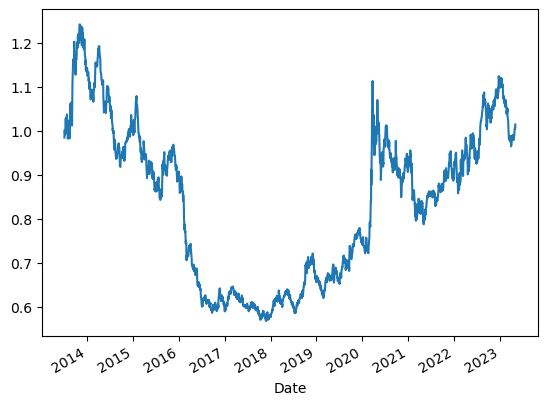

In [107]:
fig, ax = plt.subplots()
data['market_adjust'].plot(ax=ax)
plt.show()